In [131]:
import pandas as pd
import numpy as np
import yaml
import random
import sys
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.decomposition import PCA
from umap import umap_ as UMAP

from sklearn.metrics.pairwise import euclidean_distances
from sklearn import metrics

params = yaml.safe_load(open('../params.yaml'))['preprocess']
random.seed(params['seed'])

In [132]:
models_dir = Path("../saved_models")
models = [f'model{x+1}.p' for x in range(16)]

raw_data = '../data/raw/data.csv'
df = pd.read_csv(raw_data, sep=',', index_col=None)

if df.columns[0] == "id":
    df=df.drop("id", axis=1)
if df.columns[0] == "Unnamed: 0":
    df=df.drop("Unnamed: 0", axis=1)

cols = df.columns

df.head()

,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,f_09,...,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28
0,-0.389420,-0.912791,0.648951,0.589045,-0.830817,0.733624,2.258560,2,13,14,...,-0.478412,-0.757002,-0.763635,-1.090369,1.142641,-0.884274,1.137896,1.309073,1.463002,0.813527
1,-0.689249,-0.453954,0.654175,0.995248,-1.653020,0.863810,-0.090651,2,3,6,...,-0.428791,-0.089908,-1.784204,-0.839474,0.459685,1.759412,-0.275422,-0.852168,0.562457,-2.680541
2,0.809079,0.324568,-1.170602,-0.624491,0.105448,0.783948,1.988301,5,11,5,...,-0.413534,-1.602377,1.190984,3.267116,-0.088322,-2.168635,-0.974989,1.335763,-1.110655,-3.630723
3,-0.500923,0.229049,0.264109,0.231520,0.415012,-1.221269,0.138850,6,2,13,...,0.619283,1.287801,0.532837,1.036631,-2.041828,1.440490,-1.900191,-0.630771,-0.050641,0.238333
4,-0.671268,-1.039533,-0.270155,-1.830264,-0.290108,-1.852809,0.781898,8,7,5,...,-1.628830,-0.434948,0.322505,0.284326,-2.438365,1.473930,-1.044684,1.602686,-0.405263,-1.987263


In [133]:
min_max_scaler = MinMaxScaler()
df_minmax = min_max_scaler.fit_transform(df)
df_minmax = pd.DataFrame(df_minmax, columns=[cols])

df_minmax.head()

,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,f_09,...,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28
0,0.470880,0.385799,0.562361,0.546940,0.431504,0.558689,0.804339,0.06250,0.433333,0.318182,...,0.467078,0.435327,0.428585,0.431881,0.656229,0.450930,0.546854,0.603894,0.605064,0.557570
1,0.438371,0.439604,0.562946,0.595238,0.335748,0.573136,0.540179,0.06250,0.100000,0.136364,...,0.472326,0.508380,0.309548,0.450616,0.608434,0.623499,0.446892,0.453613,0.543135,0.306763
2,0.600831,0.530897,0.358769,0.402646,0.540544,0.564273,0.773949,0.15625,0.366667,0.113636,...,0.473940,0.342750,0.656568,0.757268,0.570082,0.367093,0.397413,0.605750,0.428078,0.238558
3,0.458790,0.519696,0.519301,0.504429,0.576596,0.341746,0.565985,0.18750,0.066667,0.295455,...,0.583177,0.659253,0.579803,0.590711,0.433370,0.602681,0.331975,0.469007,0.500973,0.516282
4,0.440320,0.370937,0.459521,0.259276,0.494476,0.271661,0.638294,0.25000,0.233333,0.113636,...,0.345402,0.470595,0.555270,0.534534,0.405619,0.604864,0.392484,0.624310,0.476586,0.356527


In [134]:
standard_scaler = StandardScaler()
df_standard = standard_scaler.fit_transform(df)
df_standard = pd.DataFrame(df_standard, columns=[cols])
df_standard.head()

,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,f_09,...,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28
0,-0.389551,-0.917695,0.649105,0.589499,-0.824775,0.734849,2.267432,-0.960479,1.502035,0.983395,...,-0.471839,-0.754257,-0.762195,-0.711585,0.911572,-0.680948,0.762783,0.960482,1.045296,0.683323
1,-0.688544,-0.459195,0.654321,0.995533,-1.644472,0.864967,-0.087835,-0.960479,-0.906254,-0.371415,...,-0.422434,-0.089129,-1.783073,-0.541815,0.454693,1.032386,-0.133948,-0.552942,0.355435,-1.602671
2,0.805607,0.318753,-1.167963,-0.623531,0.108638,0.785146,1.996476,-0.147872,1.020377,-0.540766,...,-0.407243,-1.597140,1.193015,2.236943,0.088090,-1.513324,-0.577814,0.979171,-0.926250,-2.224327
3,-0.500743,0.223305,0.264788,0.232124,0.417259,-1.219016,0.142257,0.122997,-1.147082,0.814044,...,0.621083,1.284518,0.534669,0.727667,-1.218753,0.825698,-1.164842,-0.397908,-0.114228,0.307002
4,-0.670613,-1.044343,-0.268745,-1.828801,-0.285713,-1.850223,0.786963,0.664735,0.057062,-0.540766,...,-1.617255,-0.433152,0.324273,0.218614,-1.484025,0.847369,-0.622034,1.166086,-0.385886,-1.149094


#### pca var 0.9 standard

In [135]:
pca = PCA()
pca.fit(df_standard)

explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance_ratio = np.cumsum(explained_variance_ratio)

threshold = 0.9

optimal_n = np.argmax(cumulative_explained_variance_ratio >= threshold) + 1

pca = PCA(n_components=optimal_n)
transformed_data = pca.fit_transform(df_standard)

columns = [f'PC{i+1}' for i in range(optimal_n)]
df_standard_pca_90 = pd.DataFrame(transformed_data, columns=columns)

#### pca var 0.95 standard

In [136]:
pca = PCA()
pca.fit(df_standard)

explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance_ratio = np.cumsum(explained_variance_ratio)

threshold = 0.95

optimal_n = np.argmax(cumulative_explained_variance_ratio >= threshold) + 1

pca = PCA(n_components=optimal_n)
transformed_data = pca.fit_transform(df_standard)

columns = [f'PC{i+1}' for i in range(optimal_n)]
df_standard_pca_95 = pd.DataFrame(transformed_data, columns=columns)

#### pca var 0.9 minmax

In [137]:
pca = PCA()
pca.fit(df_minmax)

explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance_ratio = np.cumsum(explained_variance_ratio)

threshold = 0.9

optimal_n = np.argmax(cumulative_explained_variance_ratio >= threshold) + 1

pca = PCA(n_components=optimal_n)
transformed_data = pca.fit_transform(df_minmax)

columns = [f'PC{i+1}' for i in range(optimal_n)]
df_minmax_pca_90 = pd.DataFrame(transformed_data, columns=columns)

#### pca var 0.95 minmax

In [138]:
pca = PCA()
pca.fit(df_minmax)

explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance_ratio = np.cumsum(explained_variance_ratio)

threshold = 0.95

optimal_n = np.argmax(cumulative_explained_variance_ratio >= threshold) + 1

pca = PCA(n_components=optimal_n)
transformed_data = pca.fit_transform(df_minmax)

columns = [f'PC{i+1}' for i in range(optimal_n)]
df_minmax_pca_95 = pd.DataFrame(transformed_data, columns=columns)

#### umap 10 2 0.2 standard

In [139]:
umap_transformer = UMAP.UMAP(
    n_neighbors=10,
    n_components=2,
    min_dist=0.2
)

df_standard_umap_2 = umap_transformer.fit_transform(df_standard)

columns = [f"component_{x}" for x in range(1, 3)]

df_standard_umap_2 = pd.DataFrame(data = df_standard_umap_2, columns = columns)

#### umap 10 3 0.2 standard

In [140]:
umap_transformer = UMAP.UMAP(
    n_neighbors=10,
    n_components=3,
    min_dist=0.2
)

df_standard_umap_3 = umap_transformer.fit_transform(df_standard)

columns = [f"component_{x}" for x in range(1, 4)]

df_standard_umap_3 = pd.DataFrame(data = df_standard_umap_3, columns = columns)

#### umap 10 2 0.2 minmax

In [141]:
umap_transformer = UMAP.UMAP(
    n_neighbors=10,
    n_components=2,
    min_dist=0.2
)

df_minmax_umap_2 = umap_transformer.fit_transform(df_minmax)

columns = [f"component_{x}" for x in range(1, 3)]

df_minmax_umap_2 = pd.DataFrame(data = df_minmax_umap_2, columns = columns)

#### umap 10 3 0.2 minmax

In [142]:
umap_transformer = UMAP.UMAP(
    n_neighbors=10,
    n_components=3,
    min_dist=0.2
)

df_minmax_umap_3 = umap_transformer.fit_transform(df_minmax)

columns = [f"component_{x}" for x in range(1, 4)]

df_minmax_umap_3 = pd.DataFrame(data = df_minmax_umap_3, columns = columns)

### Evaluate

In [145]:
def find_model_data(model_num):
    if model_num == 1:
        df = df_minmax_pca_90.copy(deep=True)
    elif model_num == 2:
        df = df_minmax_pca_90.copy(deep=True)
    elif model_num == 3:
        df = df_standard_pca_90.copy(deep=True)
    elif model_num == 4:
        df = df_standard_pca_90.copy(deep=True)
    elif model_num == 5:
        df = df_minmax_umap_3.copy(deep=True)
    elif model_num == 6:
        df = df_minmax_umap_3.copy(deep=True)
    elif model_num == 7:
        df = df_standard_umap_3.copy(deep=True)
    elif model_num == 8:
        df = df_standard_umap_3.copy(deep=True)
    elif model_num == 9:
        df = df_minmax_pca_90.copy(deep=True)
    elif model_num == 10:
        df = df_minmax_pca_95.copy(deep=True)
    elif model_num == 11:
        df = df_standard_pca_90.copy(deep=True)
    elif model_num == 12:
        df = df_standard_pca_95.copy(deep=True)
    elif model_num == 13:
        df = df_minmax_umap_3.copy(deep=True)
    elif model_num == 14:
        df = df_minmax_umap_2.copy(deep=True)
    elif model_num == 15:
        df = df_standard_umap_3.copy(deep=True)
    elif model_num == 16:
        df = df_standard_umap_2.copy(deep=True)
    
    return df

Model: model1


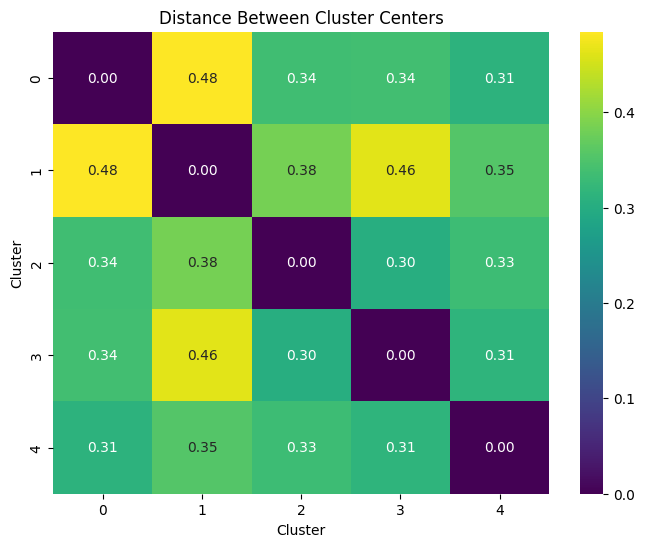

Calinski-Harabasz Index: 4044.151298058892
Davies-Bouldin Index: 3.4820825524512875
Model: model2


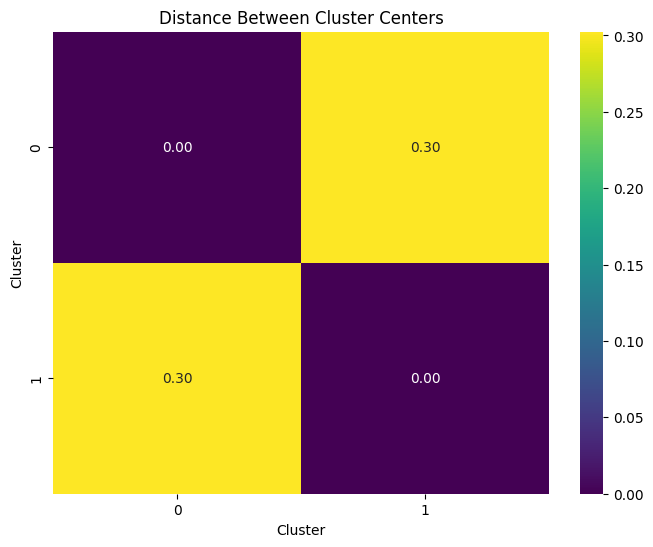

Calinski-Harabasz Index: 5914.61524705085
Davies-Bouldin Index: 3.8121354397424017
Model: model3


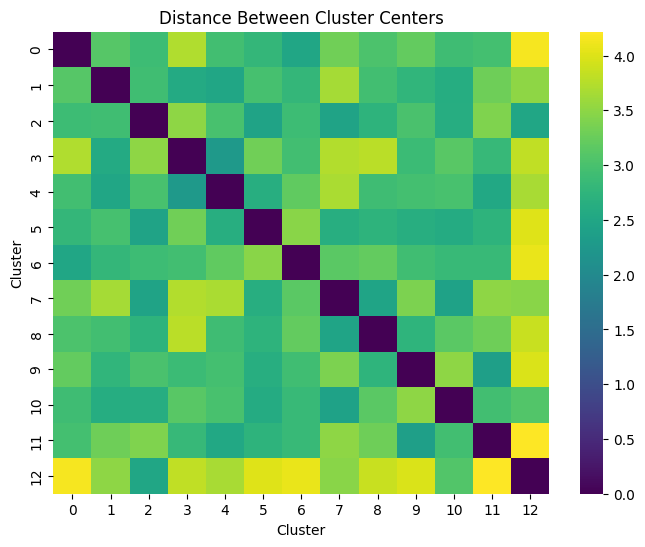

Calinski-Harabasz Index: 1671.1243399380735
Davies-Bouldin Index: 3.834087920710169
Model: model4


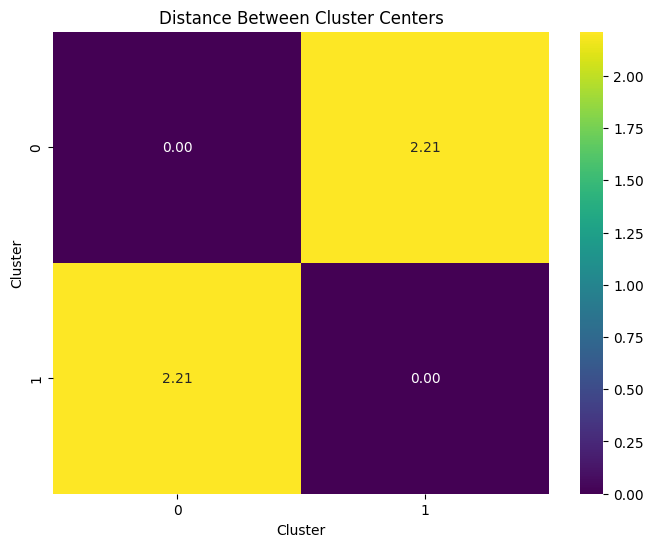

Calinski-Harabasz Index: 4533.323312883994
Davies-Bouldin Index: 4.5009591552964805
Model: model5


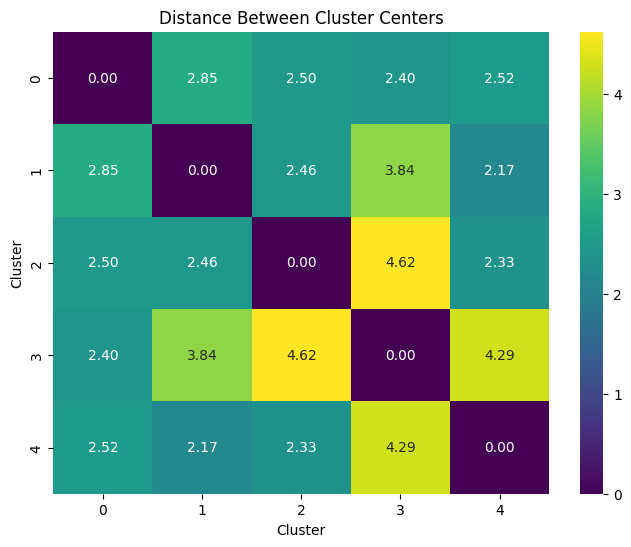

Calinski-Harabasz Index: 62317.414112551
Davies-Bouldin Index: 0.9744329420291885
Model: model6


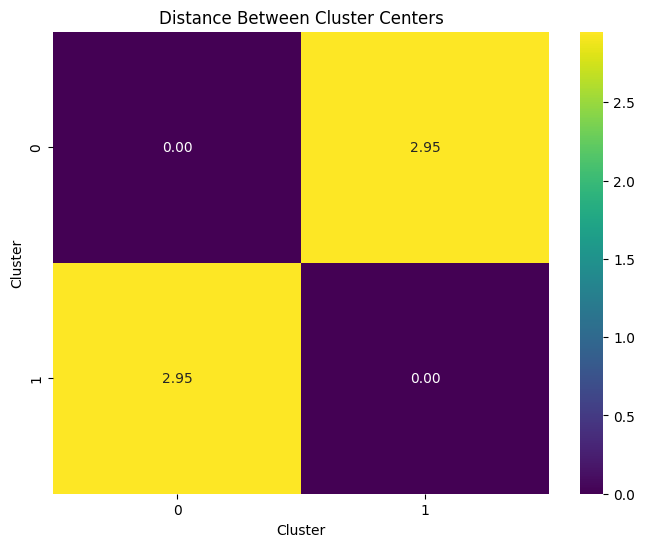

Calinski-Harabasz Index: 62343.22016373883
Davies-Bouldin Index: 1.0838028244887858
Model: model7


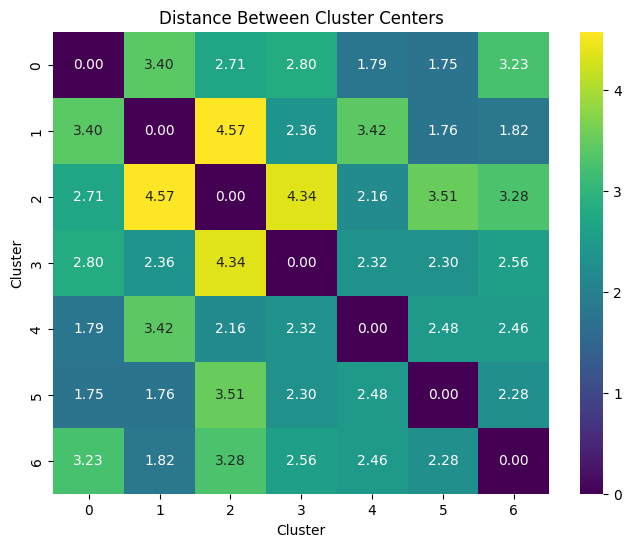

Calinski-Harabasz Index: 53604.640421633434
Davies-Bouldin Index: 1.0461329134257977
Model: model8


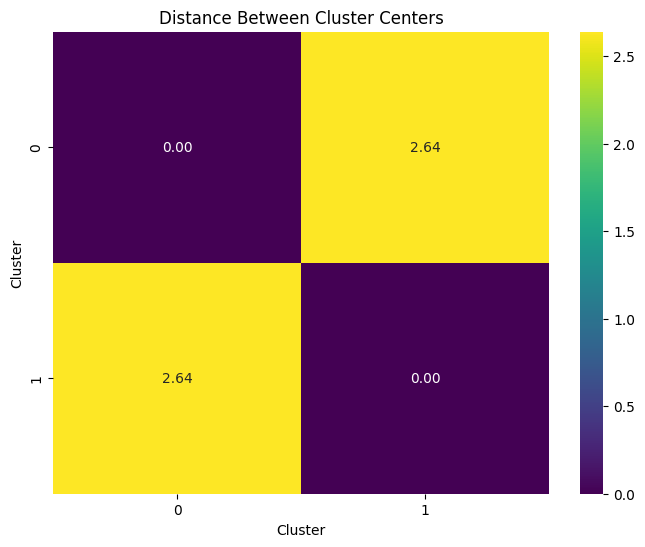

Calinski-Harabasz Index: 60088.32882378957
Davies-Bouldin Index: 1.1954859869524195
Model: model9


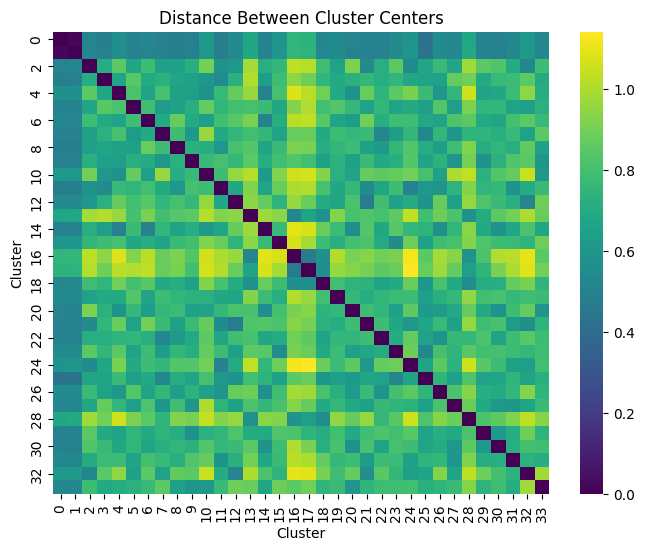

Calinski-Harabasz Index: 3.4453797868154377
Davies-Bouldin Index: 5.392616303307398
Model: model10


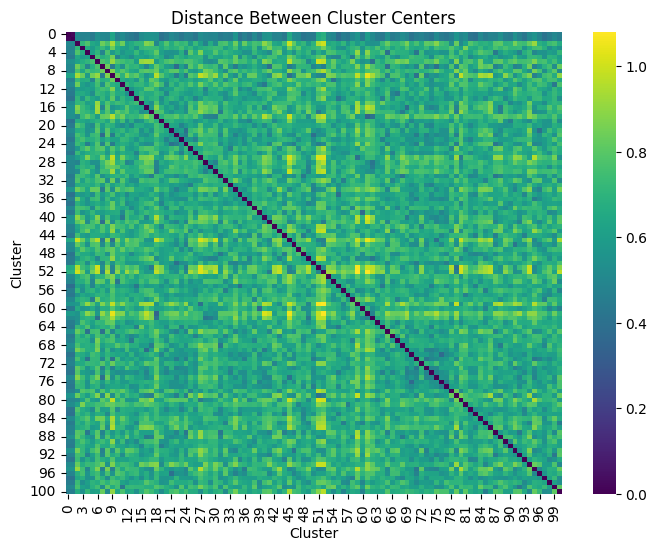

Calinski-Harabasz Index: 2.785404380621034
Davies-Bouldin Index: 3.1353465094357467
Model: model11


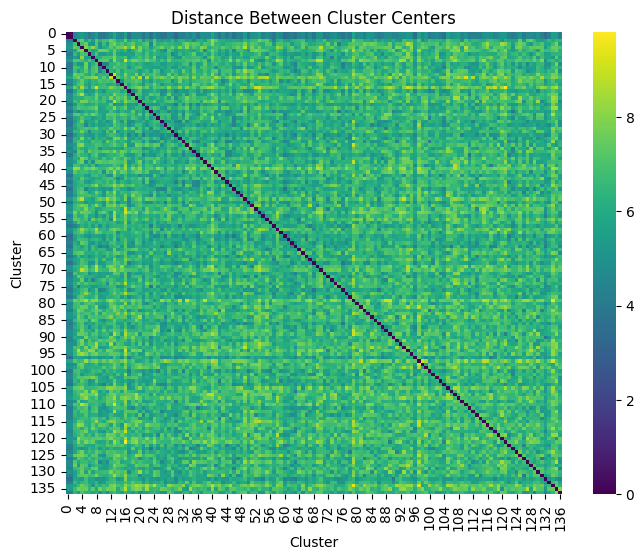

Calinski-Harabasz Index: 1.6574371452565893
Davies-Bouldin Index: 2.5092466846340944
Model: model12


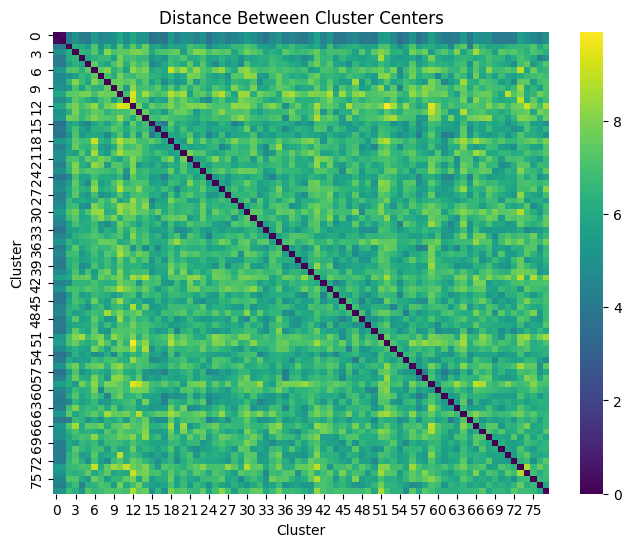

Calinski-Harabasz Index: 1.642027282469045
Davies-Bouldin Index: 2.641798439438663
Model: model13


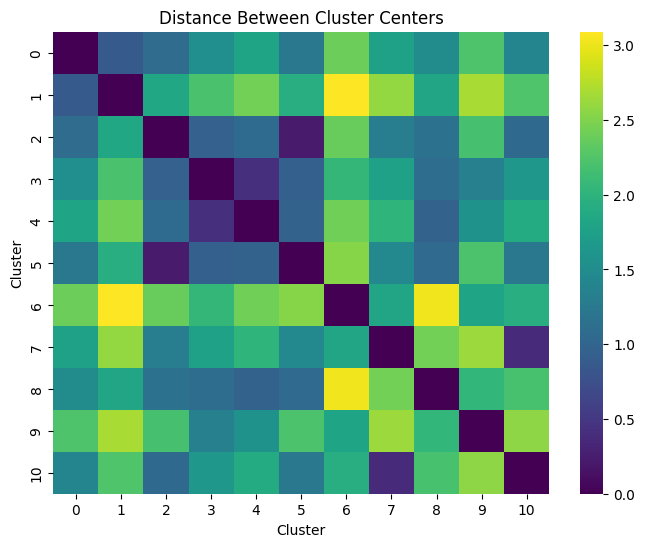

Calinski-Harabasz Index: 10.947565832421173
Davies-Bouldin Index: 2.015484118753662
Model: model14


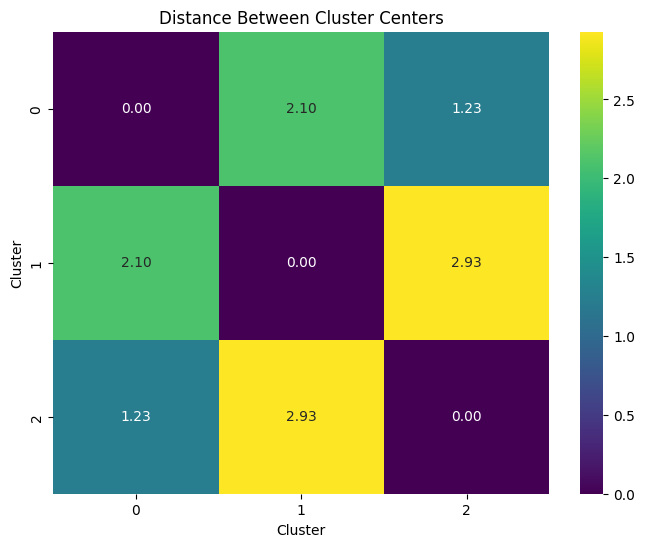

Calinski-Harabasz Index: 21.52372386303982
Davies-Bouldin Index: 2.125883744513042
Model: model15


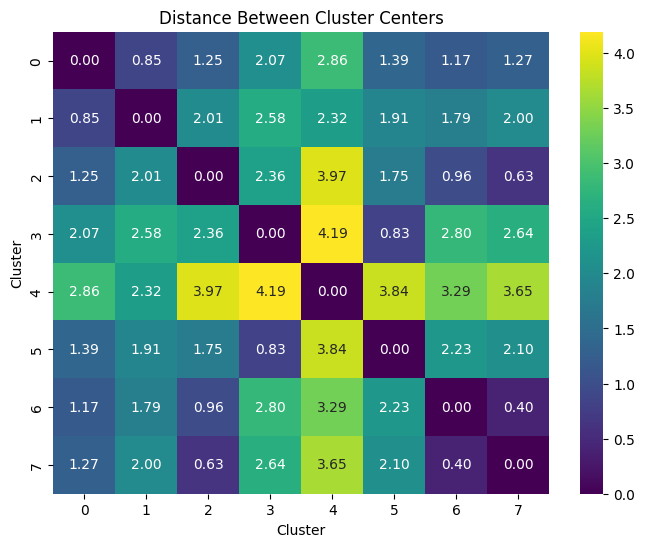

Calinski-Harabasz Index: 13.458307784891343
Davies-Bouldin Index: 2.330090887885366
Model: model16


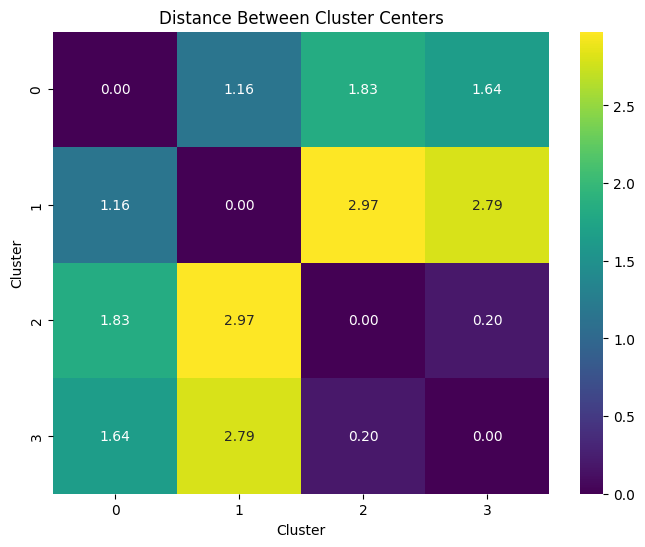

Calinski-Harabasz Index: 8.75048632147366
Davies-Bouldin Index: 3.2284881224475677


In [146]:
for model_name in models:
    model_num = int(model_name[5:-2])
    model_file = models_dir / model_name

    with open(model_file, 'rb') as f:
        model = pickle.load(f)

    df = find_model_data(model_num)

    if model_num <=8:
        labels = model.predict(df.astype(float))
    else:
        labels = model.fit_predict(df.astype(float))

    df["cluster"] = labels
    cluster_centers = df.groupby('cluster').mean()

    distance_matrix = euclidean_distances(cluster_centers)

    print(f"Model: {model_name[:-2]}")

    plt.figure(figsize=(8, 6))
    if len(df["cluster"].unique()) > 10:
        sns.heatmap(distance_matrix, cmap='viridis', annot=False, fmt=".2f", cbar=True)
    else:
        sns.heatmap(distance_matrix, cmap='viridis', annot=True, fmt=".2f", cbar=True)
    plt.title('Distance Between Cluster Centers')
    plt.xlabel('Cluster')
    plt.ylabel('Cluster')
    plt.show()  

    labels = df['cluster']

    calinski_harabasz_score = metrics.calinski_harabasz_score(df.drop(columns=["cluster"]), labels)
    print("Calinski-Harabasz Index:", calinski_harabasz_score)

    davies_bouldin_score = metrics.davies_bouldin_score(df.drop(columns=["cluster"]), labels)
    print("Davies-Bouldin Index:", davies_bouldin_score)
